In [14]:
###############################################################################
# Libraries
###############################################################################
import os
import json
import time
import glob

import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import joblib
import matplotlib.pyplot as plt

In [2]:
###############################################################################
# Parse dataset
###############################################################################
df = pd.read_csv('../../.test/results/ml/parsed_tpm.tsv', sep="\t", index_col=0)

In [3]:
###############################################################################
# Encode labels into numbers
###############################################################################



In [4]:
conditions = ['treatment_1', 'treatment_2']

In [5]:
X = df.drop(columns=conditions)



In [7]:
le={}
y={}
for cond in conditions:
    le[cond] = preprocessing.LabelEncoder()
    le[cond].fit(df[cond])
    np.save(cond+'classes.npy', le[cond].classes_)
    y[cond] = le[cond].transform(df[cond])

In [8]:

###############################################################################
# Feature selection
###############################################################################

# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'booster':'gbtree',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }         
               
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


for cond in conditions:
    print("Start feature importance for {}".format(cond))
    X_train, X_test, y_train, y_test = train_test_split(X,y[cond] ,
                                    random_state=104, 
                                    test_size=0.25, 
                                    shuffle=True)

    xgb_clf.fit(X=X_train, y=y_train,
                        eval_set=[(X_train, y_train), (X_test, y_test)],
                        verbose=200)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X.columns
    fold_importance_df["importance"] = xgb_clf.feature_importances_

    fold_importance_df.sort_values(by=["importance"], inplace=True)
    fold_importance_df.to_csv(cond+"importance.tmp", sep="\t", index=False)

/home/petroskilp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/petroskilp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/petroskilp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(


Start feature importance for treatment_1
[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[99]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
Start feature importance for treatment_2
[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[99]	validation_0-logloss:0.69315	validation_1-logloss:0.69315


In [20]:
###############################################################################
# Models
###############################################################################

models = {
    'knn': KNeighborsClassifier(),
    'svc': SVC(),
    'lr' : LogisticRegression(), 
    'dt' : DecisionTreeClassifier(),
    'gb' : GaussianNB(),
    'rf' : RandomForestClassifier(),
    'mlp': MLPClassifier()
    }

Start process for condition: treatment_1
****************************************************************************************************
Start process for model: knn
Trained model: knn in 0.05449700355529785
Predicted model: knn in 0.1714785099029541
Accuracy knn: 0.0
[[0 1]
 [1 0]]


/home/petroskilp/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


****************************************************************************************************
Start process for model: svc
Trained model: svc in 0.12483644485473633
Predicted model: svc in 0.18432998657226562
Accuracy svc: 0.0
[[0 1]
 [1 0]]
****************************************************************************************************
Start process for model: lr
Trained model: lr in 0.1423327922821045
Predicted model: lr in 0.28821420669555664
Accuracy lr: 0.0
[[0 1]
 [1 0]]
****************************************************************************************************
Start process for model: dt
Trained model: dt in 0.1381208896636963
Predicted model: dt in 0.21269440650939941
Accuracy dt: 0.0
[[0 1]
 [1 0]]
****************************************************************************************************
Start process for model: gb
Trained model: gb in 0.07457971572875977
Predicted model: gb in 0.14951181411743164
Accuracy gb: 0.0
[[0 1]
 [1 0]]
******************

/home/petroskilp/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


****************************************************************************************************
Start process for model: svc
Trained model: svc in 0.05239224433898926
Predicted model: svc in 0.10524392127990723
Accuracy svc: 1.0
[[1 0]
 [0 1]]
****************************************************************************************************
Start process for model: lr
Trained model: lr in 0.09243607521057129
Predicted model: lr in 0.23165059089660645
Accuracy lr: 1.0
[[1 0]
 [0 1]]
****************************************************************************************************
Start process for model: dt
Trained model: dt in 0.14018630981445312
Predicted model: dt in 0.24549126625061035
Accuracy dt: 1.0
[[1 0]
 [0 1]]
****************************************************************************************************
Start process for model: gb
Trained model: gb in 0.10654234886169434
Predicted model: gb in 0.2133493423461914
Accuracy gb: 1.0
[[1 0]
 [0 1]]
*****************

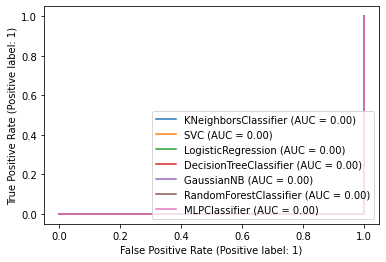

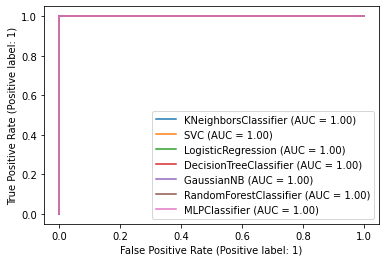

In [21]:
###############################################################################
# Training pipeline
###############################################################################
for cond in conditions:
    print("Start process for condition: {}".format(cond))
    fig = plt.figure()
    ax = plt.gca()
    for model_name in models:
        
        print(100*'*')
        print("Start process for model: {}".format(model_name))
        
        model = models[model_name]
        
        reports = []
        
            
        start = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X,y[cond] ,
                                    random_state=104, 
                                    test_size=0.25, 
                                    shuffle=True)
        
        # Train classifier
        train_start = time.time()
        model.fit(X_train, y_train)
        train_finish = time.time() - train_start
        
        print("Trained model: {} in {}".format(model_name, train_finish))
        
        # Predict on test set
        y_pred = model.predict(X_test)
        
        print("Predicted model: {} in {}".format(model_name, time.time() - start))
        score = accuracy_score(y_test, y_pred)
        print("Accuracy {}: {}".format(model_name, score))
        cm=confusion_matrix(y_test, y_pred)
        print(cm)
        #plot_roc_curve(model, X_test, y_test, ax=ax)
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax)
        joblib.dump(model, cond+"_"+model_name+"model.pkl")
    plt.savefig(cond+'_roc_curve.png')